# Worksheet 10 - Clustering

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe a case where clustering would be an appropriate tool, and what insight it would bring from the data.
* Explain the K-means clustering algorithm.
* Interpret the output of a k-means cluster analysis.
* Perform K-means clustering in R
* Visualize the output of K-means clustering in R using a coloured scatter plot
* Identify when it is necessary to scale variables before clustering and do this using R
* Use the elbow method to choose the number of clusters for k-means
* Describe advantages, limitations and assumptions of the k-means clustering algorithm.

This worksheet covers parts of [the Clustering chapter](https://datasciencebook.ca/clustering.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(forcats)
library(repr)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Question 0.0** Multiple Choice:
<br> {points: 1}

In which of the following scenarios would clustering methods likely be appropriate?

A. Identifying sub-groups of houses according to their house type, value, and geographical location

B. Predicting whether a given user will click on an ad on a website

C. Segmenting customers based on their preferences to target advertising

D. Both A. and B.

E. Both A. and C. 

*Assign your answer to an object called `answer0.0`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [10]:
# your code here
answer0.0 <- "E"

In [11]:
test_0.0()

Test passed 🥳
[1] "Success!"


**Question 0.1** Multiple Choice:
<br> {points: 1}

Which step in the description of the K-means algorithm below is *incorrect*?

0. Choose the number of clusters

1. Randomly assign each of the points to one of the clusters

2. Calculate the position for the cluster centre (centroid) for each of the clusters (this is the middle of the points in the cluster, as measured by straight-line distance)

3. Re-assign each of the points to the cluster whose centroid is furthest from that point

4. Repeat steps 2 - 3 until the cluster centroids don't change at all

*Assign your answer to an object called `answer0.1`. Your answer should be a single numerical character surrounded by quotes.*

In [18]:
# your code here
answer0.1 <- "3"

In [19]:
test_0.1()

Test passed 🌈
[1] "Success!"


## Hoppy Craft Beer

Craft beer is a strong market in Canada and the US, and is expanding to other countries as well. If you wanted to get into the craft beer brewing market, you might want to better understand the product landscape. One popular craft beer product is hopped craft beer. Breweries create/label many different kinds of hopped craft beer, but how many different kinds of hopped craft beer are there really when you look at the chemical properties instead of the human labels? 

We will start to look at the question by looking at a [craft beer data set from Kaggle](https://www.kaggle.com/nickhould/craft-cans#beers.csv). In this data set, we will use the alcoholic content by volume  (`abv` column) and the International bittering units (`ibu` column) as variables to try to cluster the beers. The `abv` variable has values 0 (indicating no alcohol) up to 1 (pure alcohol) and the `ibu` variable quantifies the bitterness of the beer (higher values indicate higher bitterness).

**Question 1.0** 
<br> {points: 1}

Read in the `beers.csv` data using `read_csv()` and assign it to an object called `beer`. The data is located within the `worksheet_10/data/` folder. 

*Assign your dataframe answer to an object called `beer`.*

In [22]:
# your code here

beer <- read_csv("data/beers.csv")

New names:
• `` -> `...1`
Rows: 2410 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, style
dbl (6): ...1, abv, ibu, id, brewery_id, ounces

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
test_1.0()

Test passed 🎊
Test passed 🥇
Test passed 🌈
Test passed 🥇
[1] "Success!"


**Question 1.1**
<br> {points: 1}

Let's start by visualizing the variables we are going to use in our cluster analysis as a scatter plot. Put `ibu` on the horizontal axis, and `abv` on the vertical axis. Name the plot object `beer_plot`. 

*Assign your plot to an object named `beer_plot`, and remember to follow the best visualization practices, including adding human-readable labels to your plot.*

Warning message:
“Removed 1005 rows containing missing values (`geom_point()`).”


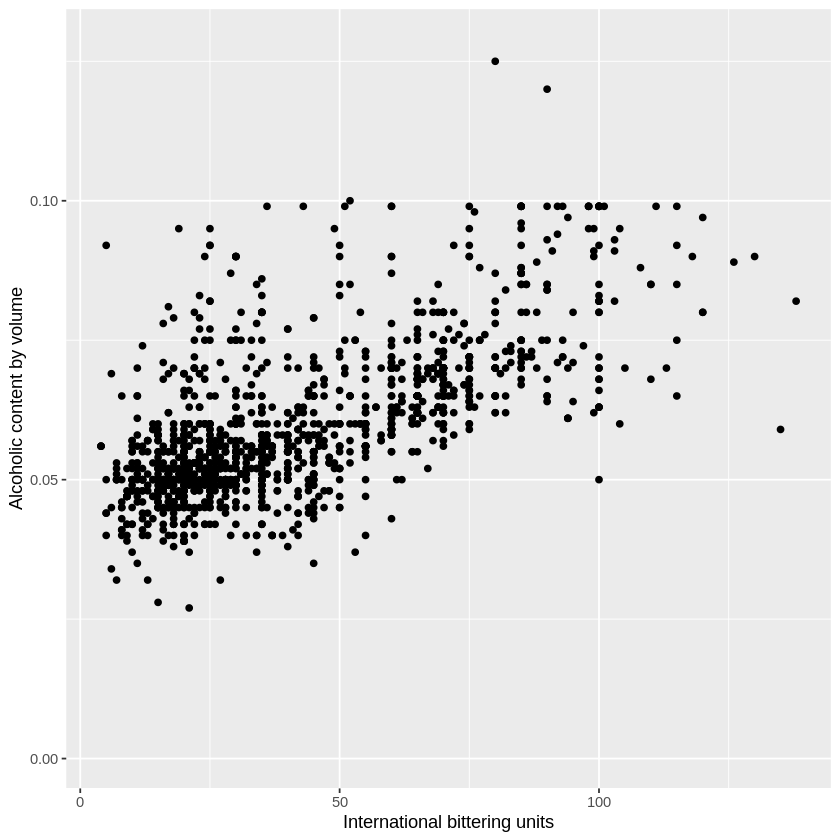

In [29]:
# your code here
beer_plot <- beer |>
    ggplot(aes(x = ibu, y = abv)) +
    geom_point() +
    xlab("International bittering units") +
    ylab("Alcoholic content by volume")

beer_plot

In [30]:
test_1.1()

Test passed 😀
Test passed 🎉
Test passed 🌈
Test passed 🥳
Test passed 😸
[1] "Success!"


**Question 1.2**
<br> {points: 1}

We need to clean this data a bit. Specifically, we need to remove the rows where `ibu` is `NA`, and select only the columns we are interested in clustering, which are `ibu` and `abv`. 

*Assign your answer to an object named `clean_beer`.*

In [41]:
# your code here
clean_beer <- beer |>
    filter(ibu != "NA") |>
    select(ibu, abv)

clean_beer

ibu,abv
<dbl>,<dbl>
60,0.061
92,0.099
45,0.079
⋮,⋮
50,0.060
45,0.067
40,0.055


In [42]:
test_1.2()

Test passed 🥳
Test passed 😸
Test passed 🌈
Test passed 🎉
[1] "Success!"


**Question 1.3** Multiple Choice:
<br>{points: 1}

Why do we need to scale the variables when using K-means clustering?

A. K-means uses the Euclidean distance to compute how similar data points are to each cluster center

B. K-means is an iterative algorithm

C. Some variables might be more important for prediction than others

D. To make sure their mean is 0

*Assign your answer to an object named `answer1.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [43]:
# your code here
answer1.3 <- "A"

In [44]:
test_1.3()

Test passed 🎉
[1] "Success!"


**Question 1.4**
<br> {points: 1}

We will now build a `tidymodels` workflow to cluster the data. The first step is to create a `recipe` that specifies that we want to center and scale all of the variables in the `clean_beer` data frame. 

*Recall that we used a `recipe` for scaling when doing classification and regression. Even though `recipe`s were originally designed for predictive modeling tasks (like classification and regression), the `tidyclust` library lets us use our familiar `tidymodels` functions for clustering too!*

*Assign your answer to an object named `kmeans_recipe`. Use the scaffolding provided.*

In [55]:
 kmeans_recipe <- recipe( ~ . , data = clean_beer) |> 
        step_scale(all_predictors()) |>
        step_center(all_predictors())


kmeans_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [56]:
test_1.4()

Test passed 🎉
Test passed 🎉
Test passed 😀
[1] "Success!"


**Question 1.5**
<br>{points: 1}

The next step in our `tidymodels` workflow is a model specification that specifies that we want to cluster the data. From our exploratory data visualization, 2 seems like a reasonable number of clusters. Use the `k_means` function with `num_clusters = 2` to perform clustering with this choice of $k$. Make sure to use the "stats" engine.

*Assign your answer to an object named `kmeans_spec`. Use the scaffolding provided.*

In [62]:
 kmeans_spec <- k_means(num_clusters = 2) |>
        set_engine("stats")


kmeans_spec

K Means Cluster Specification (partition)

Main Arguments:
  num_clusters = 2

Computational engine: stats 


In [63]:
test_1.5()

Test passed 🌈
Test passed 🥳
Test passed 🎉
Test passed 🥇
[1] "Success!"


**Question 1.6**
<br> {points: 1}

Combine the recipe and model specification into a `workflow`, and fit the `workflow` on the `clean_beer` data.

*Assign your model to an object named `kmeans_fit`. Note that since k-means uses a random initialization, we need to set the seed; don't change the value!*

In [66]:
# DON'T CHANGE THE SEED VALUE!
set.seed(1234)

kmeans_fit <- workflow() |>
    add_recipe(kmeans_recipe) |>
    add_model(kmeans_spec) |>
    fit(data = clean_beer)

kmeans_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: k_means()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-means clustering with 2 clusters of sizes 917, 488

Cluster means:
         ibu        abv
1 -0.5830271 -0.5506271
2  1.0955653  1.0346824

Clustering vector:
   [1] 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 1 2
  [38] 1 2 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2
  [75] 1 1 1 1 2 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 2
 [112] 2 1 1 2 2 1 2 2 1 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 2 2 2
 [149] 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 2 1 2 1 2 1 1 2 2 2 1 1 1 1 1 2 1 1
 [186] 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 [223] 1 1 1 1 2 1 2 1 

In [67]:
test_1.6()

Test passed 🎉
Test passed 🥇
Test passed 🌈
Test passed 🎊
Test passed 😀
[1] "Success!"


**Question 1.7**
<br> {points: 1}

Use the `augment` function to add the cluster assignment for each point to the `clean_beer` data frame. 

*Assign your answer to an object named `labelled_beer`.* 

In [70]:
 labelled_beer <- augment(kmeans_fit, clean_beer)

labelled_beer

ibu,abv,.pred_cluster
<dbl>,<dbl>,<fct>
60,0.061,Cluster_1
92,0.099,Cluster_1
45,0.079,Cluster_1
⋮,⋮,⋮
50,0.060,Cluster_2
45,0.067,Cluster_1
40,0.055,Cluster_2


In [71]:
test_1.7()

Test passed 🥇
Test passed 🎉
Test passed 🌈
Test passed 🥳


**Question 1.8**
<br> {points: 1}

Create a scatter plot of `abv` on the y-axis versus `ibu` on the x-axis (using the data in `labelled_beer`) where the points are labelled by their cluster assignment. Name the plot object `cluster_plot`.

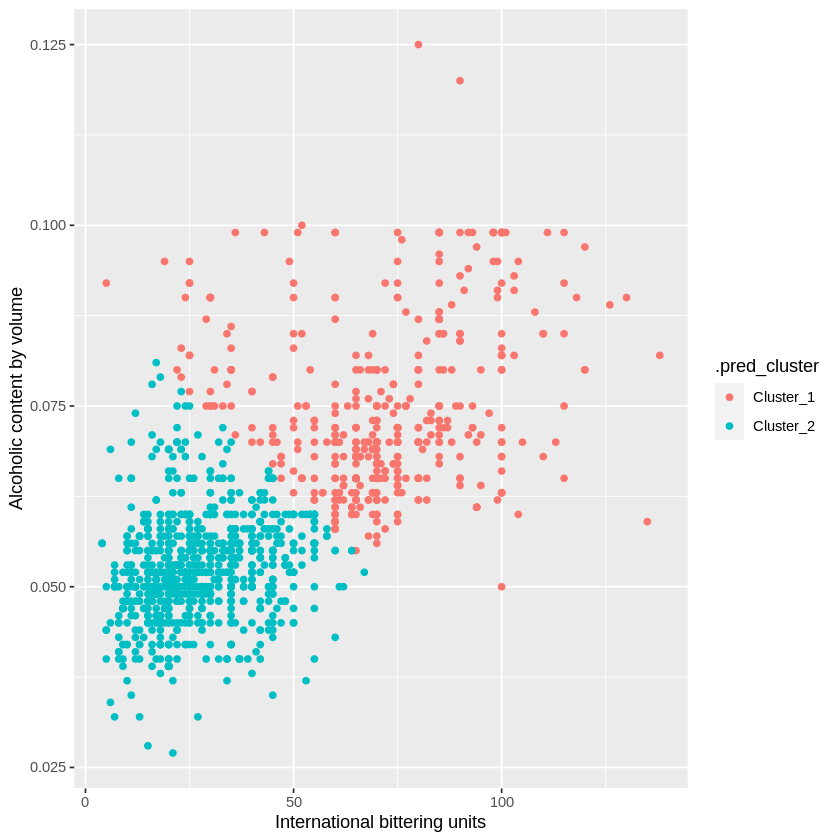

In [82]:
# your code here
cluster_plot <- labelled_beer |>
    ggplot(aes(x = ibu, y = abv, color = .pred_cluster)) +
    geom_point() +
    xlab("International bittering units") +
    ylab("Alcoholic content by volume")

cluster_plot

In [83]:
test_1.8()

Test passed 🥇
Test passed 🌈
Test passed 😸
Test passed 🌈
Test passed 🎊
Test passed 🎊
Test passed 🥇
[1] "Success!"


**Question 1.9.1** Multiple Choice:
<br> {points: 1}

We do not know, however, that two clusters ($K$ = 2) is the best choice for this data set. What can we do to choose the best $K$?

A. Perform *cross-validation* for a variety of possible $K$s. Choose the one where within-cluster sum of squares distance starts to *decrease less*.

B. Perform *cross-validation* for a variety of possible $K$s. Choose the one where the within-cluster sum of squares distance starts to *decrease more*. 

C. Perform *clustering* for a variety of possible $K$s. Choose the one where within-cluster sum of squares distance starts to *decrease less*.

D. Perform *clustering* for a variety of possible $K$s. Choose the one where the within-cluster sum of squares distance starts to *decrease more*. 

*Assign your answer to an object called `answer1.9.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [88]:
# your code here
answer1.9.1 <- "C"

In [89]:
test_1.9.1()

Test passed 🥳
[1] "Success!"


**Question 1.9.2**
<br> {points: 1}

Use the `glance` function to get the model-level statistics for the clustering we just performed, including total within-cluster sum of squares. 

*Assign your answer to an object named `clustering_stats`.*

In [94]:
# your code here
clustering_stats <- glance(kmeans_fit)
clustering_stats

totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<int>
2808,1110.102,1697.898,1


In [95]:
test_1.9.2()

Test passed 🌈
Test passed 🌈
Test passed 😸
Test passed 🎊
Test passed 😀
[1] "Success!"


**Question 1.9.3**
<br>{points: 1}

What is the total within cluster sum-of-squares distance for this clustering (rounded to 2 decimals)?

*Assign your answer to an object named `totalWSSD`. Round your answer to 2 decimal points.*

In [96]:
# your code here
totalWSSD <- 1110.10

In [97]:
test_1.9.3()

Test passed 😸
Test passed 🎉
Test passed 🌈
[1] "Success!"


**Question 2.0**
<br> {points: 1}

Let's now choose the best $K$ for this clustering problem. To do this we need to create a tibble with a column having the same name as the parameter we want to tune (`num_clusters`), taking values 1 to 10. 

*Assign your answer to an object named `beer_ks`.*

In [98]:
# your code here

beer_ks <- tibble(num_clusters = 1:10)

In [99]:
test_2.0()

Test passed 🥳
Test passed 😸
[1] "Success!"


**Question 2.1**
<br> {points: 1}

We also need to create a new model specification that lets `tidymodels` tune the number of clusters. Rather than setting `num_clusters` to a particular value in the model specification, set it to `tune()`. Use `nstart = 10` restarts.

*Assign your answer to an object named `kmeans_spec_tune`.*

In [100]:
 kmeans_spec_tune <- k_means(num_clusters = tune()) |>
        set_engine("stats", nstart = 10)


kmeans_spec_tune

K Means Cluster Specification (partition)

Main Arguments:
  num_clusters = tune()

Engine-Specific Arguments:
  nstart = 10

Computational engine: stats 


In [101]:
test_2.1()

Test passed 🥳
Test passed 🥇
Test passed 🎊
Test passed 🎉
Test passed 😀
[1] "Success!"


**Question 2.2**
<br>{points: 1}

Now combine the new model specification and our original recipe into a new `workflow`. Include the `tune_clusters` function in the workflow to run the tuning procedure. In the `tune_clusters` function, specify the `resamples` argument to be `apparent(clean_beer)` so that we use the same full data for each tuning trial. Also specify the `grid` argument to be the data frame of values of $K$ we just created. Finally, include the `collect_metrics` step to gather the results of the tuning procedure.

*Assign your answer to an object named `kmeans_tuning_stats`*.

In [110]:
# DON'T CHANGE THE SEED VALUE!
set.seed(9999)
 
 kmeans_tuning_stats <- workflow() |>
        add_recipe(kmeans_recipe) |>
        add_model(kmeans_spec_tune) |>
        tune_cluster(resamples = apparent(clean_beer), grid = beer_ks) |>
        collect_metrics()


kmeans_tuning_stats

num_clusters,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,sse_total,standard,2808,1,NA,Preprocessor1_Model01
1,sse_within_total,standard,2808,1,NA,Preprocessor1_Model01
2,sse_total,standard,2808,1,NA,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,sse_within_total,standard,283.7762,1,NA,Preprocessor1_Model09
10,sse_total,standard,2808.0000,1,NA,Preprocessor1_Model10
10,sse_within_total,standard,259.5520,1,NA,Preprocessor1_Model10


In [111]:
test_2.2()

Test passed 🎉
Test passed 🌈
Test passed 😀
Test passed 😀
[1] "Success!"


**Question 2.3**
<br> {points: 1}

Now we need to extract the total WSSD results from the `kmeans_tuning_stats` data frame. Recall that we want to look at the `mean` variable for rows where the `.metric` variable is `sse_within_total`. Use the `filter`, `select`, and `mutate` functions to create a data frame containing only two variables: `num_clusters` and `total_WSSD`.

*Assign your answer to an object named `tidy_tuning_stats`.*

In [115]:
tidy_tuning_stats <- kmeans_tuning_stats |>
        mutate(total_WSSD = mean) |>
        filter(.metric == "sse_within_total") |>
        select(num_clusters, total_WSSD)


print(tidy_tuning_stats)

# A tibble: 10 × 2
   num_clusters total_WSSD
          <int>      <dbl>
 1            1      2808 
 2            2      1110.
 3            3       803.
 4            4       613.
 5            5       474.
 6            6       410.
 7            7       360.
 8            8       316.
 9            9       284.
10           10       260.


In [116]:
test_2.3()

Test passed 😸
Test passed 🎊
Test passed 🥇
Test passed 🌈
Test passed 😀
[1] "Success!"


**Question 2.4**
<br> {points: 1}

We now have the the values for total within-cluster sum of squares for each model in a column (`total_WSSD`). Let's use it to create a line plot with points of total within-cluster sum of squares versus $K$, so that we can choose the best number of clusters to use. 

*Assign your plot to an object called `choose_beer_k`. Total within-cluster sum of squares should be on the y-axis and $K$ should be on the x-axis. Remember to follow the best visualization practices, including adding human-readable labels to your plot.*

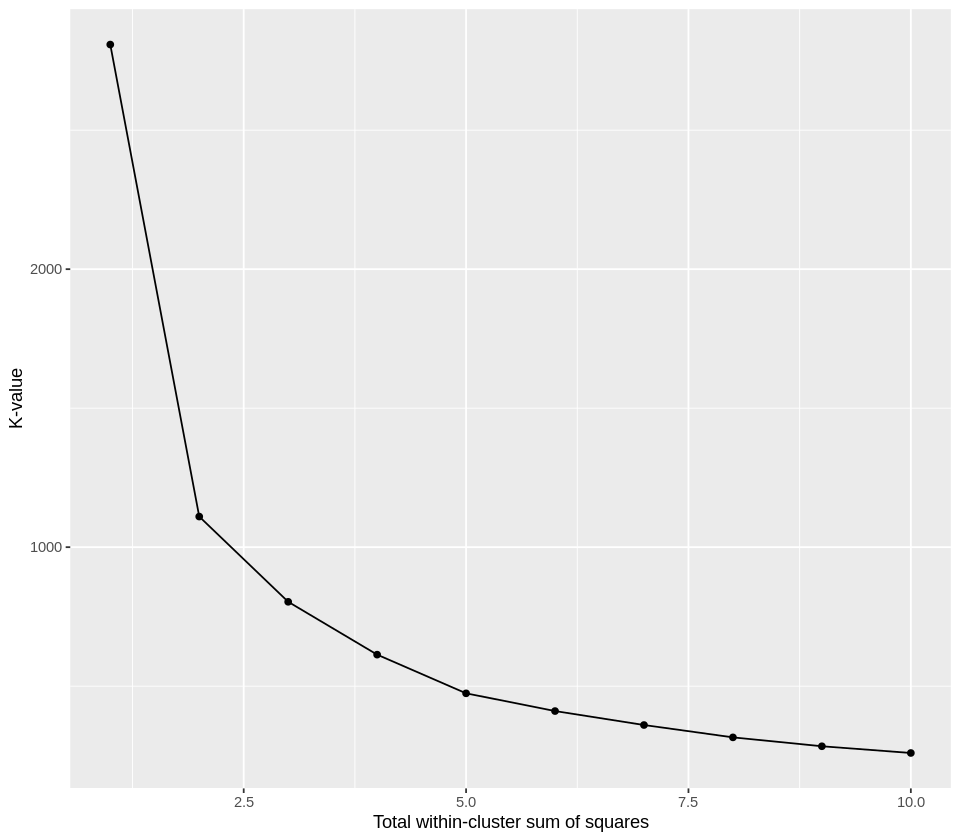

In [125]:
options(repr.plot.width = 8, repr.plot.height = 7)

choose_beer_k <- tidy_tuning_stats |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_line() +
    geom_point() +
    ylab("K-value") +
    xlab("Total within-cluster sum of squares")

choose_beer_k

In [126]:
test_2.4()

Test passed 🎉
Test passed 😀
Test passed 🌈
Test passed 🥇
Test passed 🥇
Test passed 🎊
[1] "Success!"


**Question 2.5**
<br> {points: 1}

From the plot above, which $K$ should we choose? 

*Assign your answer to an object called `answer2.5`. Make sure your answer is a single numerical character surrounded by quotation marks.*

In [129]:
# your code here
answer2.5 <- "3"

In [130]:
test_2.5()

Test passed 😀
[1] "Success!"


**Question 2.6**
<br> {points: 1}

Why did we choose the $K$ we chose above?

A. It had the greatest total within-cluster sum of squares

B. It had the smallest total within-cluster sum of squares

C. Increasing $K$ further than this only decreased the total within-cluster sum of squares a small amount

D. Increasing $K$ further than this only increased the total within-cluster sum of squares a small amount

*Assign your answer to an object called `answer2.6`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [135]:
# your code here
answer2.6 <- "C"

In [136]:
test_2.6()

Test passed 🌈
[1] "Success!"


**Question 2.7** Multiple Choice:
<br> {points: 1}

What can we conclude from our analysis? How many different types of hoppy craft beer are there in this data set using the two variables we have? 


A. 1

B. 2 to 4

C. 5 to 7

D. more than 7

*Assign your answer to an object called `answer2.7`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [141]:
# your code here
answer2.7 <- "B"

In [142]:
test_2.7()

Test passed 🥇
[1] "Success!"


**Question 2.8** True or false:
<br> {points: 1}

Our analysis might change if we added additional variables, true or false?

*Assign your answer to an object called `answer2.8`. Make sure your answer is written in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).* 

In [143]:
# your code here
answer2.8 <- "true"

In [144]:
test_2.8()

Test passed 🎉
[1] "Success!"


In [145]:
source("cleanup.R")